In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'float',
    'YearSeason': 'str',
    'LactationNumber': 'float',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float',
    'FarmHeatStressMilkProduction': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/BLRMilkFarmYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYield,NormalizedDailyYieldChange,Residuals,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,FarmHeatStressMilkProduction
0,2022-05-28,a624fb9a,SE-064c0cec-1189,3242,02 SLB,8.0,3.0,2022-2,15.22,NaN,...,1.135858,NaN,1.820438,0,0,0,0,9.912500,50.478673,NaN
1,2022-05-29,a624fb9a,SE-064c0cec-1189,3243,02 SLB,8.0,4.0,2022-2,18.96,15.22,...,1.091521,0.215311,1.589745,0,0,0,0,10.066667,53.841648,NaN
2,2022-05-30,a624fb9a,SE-064c0cec-1189,3244,02 SLB,8.0,5.0,2022-2,22.64,18.96,...,1.091326,0.177389,1.894598,0,1,0,0,10.466667,52.935959,NaN
3,2022-05-31,a624fb9a,SE-064c0cec-1189,3245,02 SLB,8.0,6.0,2022-2,26.49,22.64,...,1.121861,0.163049,2.877443,0,0,0,0,11.183333,52.872112,NaN
4,2022-06-01,a624fb9a,SE-064c0cec-1189,3246,02 SLB,8.0,7.0,2022-3,33.61,26.49,...,1.290389,0.273358,7.563598,0,1,0,0,12.704167,56.056547,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576066,2024-08-09,f454e660,SE-f454e660-810,1020,99 Korsning/obestämbar ras,1.0,365.0,2024-3,37.53,31.36,...,1.027417,0.168909,1.001508,1,1,0,0,18.650000,62.298109,-0.049177
576067,2024-08-10,f454e660,SE-f454e660-810,1021,99 Korsning/obestämbar ras,1.0,365.0,2024-3,36.48,37.53,...,0.998673,-0.028745,-0.048492,1,1,0,0,18.308333,54.687773,-0.049177
576068,2024-08-11,f454e660,SE-f454e660-810,1022,99 Korsning/obestämbar ras,1.0,365.0,2024-3,34.76,36.48,...,0.951586,-0.047087,-1.768492,1,1,0,0,17.841667,55.974084,-0.049177
576069,2024-08-12,f454e660,SE-f454e660-810,1023,99 Korsning/obestämbar ras,1.0,365.0,2024-3,38.06,34.76,...,1.041926,0.090340,1.531508,1,1,0,0,17.516667,60.115007,-0.049177


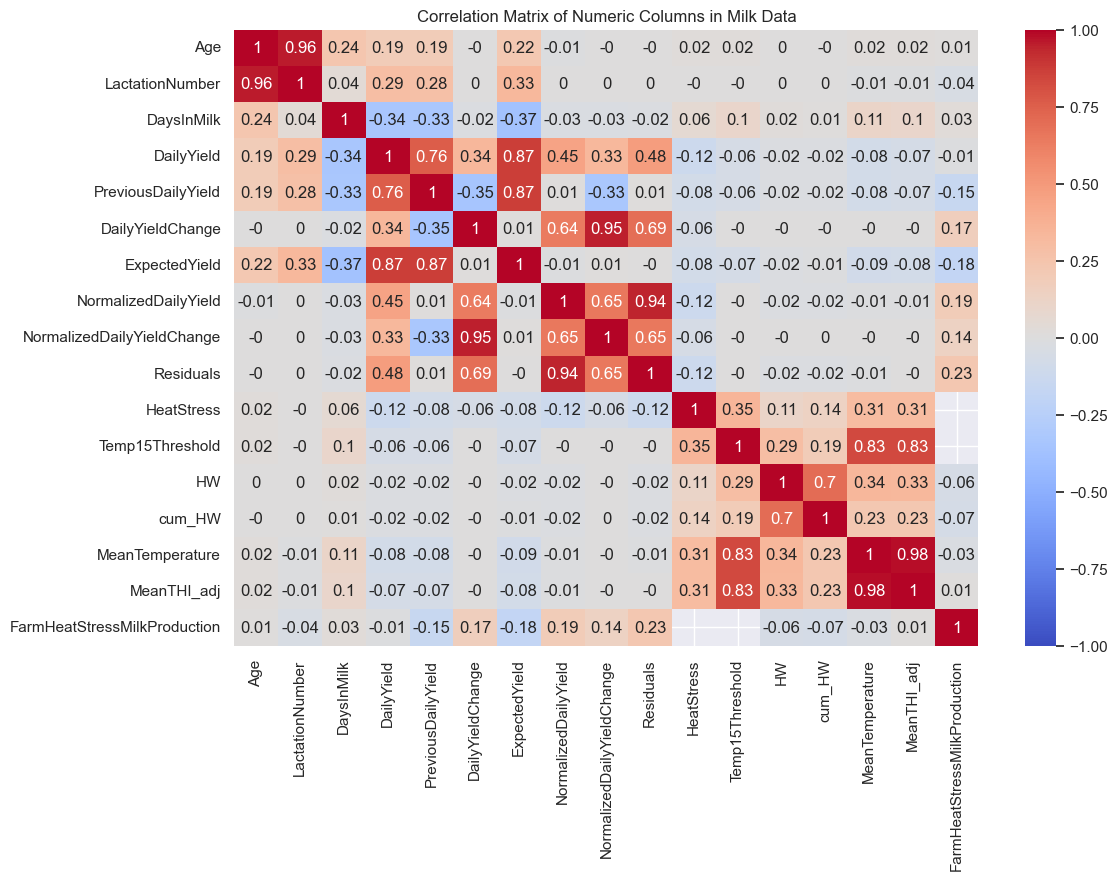

In [3]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

In [4]:
def plot_correlation_deviation_for_farm(farm_name, milk_data):
    # Filter the data for the specified farm
    farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_name]
    
    # Calculate the correlation for each cow within the farm
    grouped = farm_data.groupby('SE_Number')
    correlations = pd.DataFrame({
        'SE_Number': list(grouped.groups.keys()),
        'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
    })
    
    # Calculate the baseline (mean correlation)
    baseline_correlation = correlations['Correlation'].mean()
    
    # Calculate deviations from the baseline
    correlations['Deviation from Baseline'] = correlations['Correlation'] - baseline_correlation
    
    # Plotting
    plt.figure(figsize=(17, 6))
    barplot = sns.barplot(x='SE_Number', y='Deviation from Baseline', data=correlations, hue='SE_Number', palette='Spectral', dodge=False, legend=False)

    # Add baseline line
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label=f'Baseline (Mean Correlation = {baseline_correlation:.4f})')

    # Formatting the plot
    plt.xlabel('Individual Cow', fontsize=14)
    plt.ylabel('Deviation from Mean Correlation', fontsize=14)
    plt.title(f'Correlation Deviation from Baseline for Each Cow at {farm_name}', fontsize=16)

    # Remove x-axis ticks
    plt.xticks([])
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [5]:
def plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data):
    # Filter the data for the specified farm
    farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_name]
    
    # Calculate the correlation for each cow within the farm
    grouped = farm_data.groupby('SE_Number')
    correlations = pd.DataFrame({
        'SE_Number': list(grouped.groups.keys()),
        'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
    })
    
    # Calculate deviations from the baseline (which is now 0)
    correlations['Deviation from Baseline'] = correlations['Correlation']
    
    # Plotting
    plt.figure(figsize=(17, 6))
    barplot = sns.barplot(x='SE_Number', y='Deviation from Baseline', data=correlations, hue='SE_Number', palette='Spectral', dodge=False, legend=False)

    # Add baseline line
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Baseline (Correlation = 0)')

    # Formatting the plot
    plt.xlabel('Individual Cow', fontsize=14)
    plt.ylabel('Deviation from Zero Baseline', fontsize=14)
    plt.title(f'Correlation Deviation from Zero Baseline for Each Cow at {farm_name}', fontsize=16)

    # Remove x-axis ticks
    plt.xticks([])
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

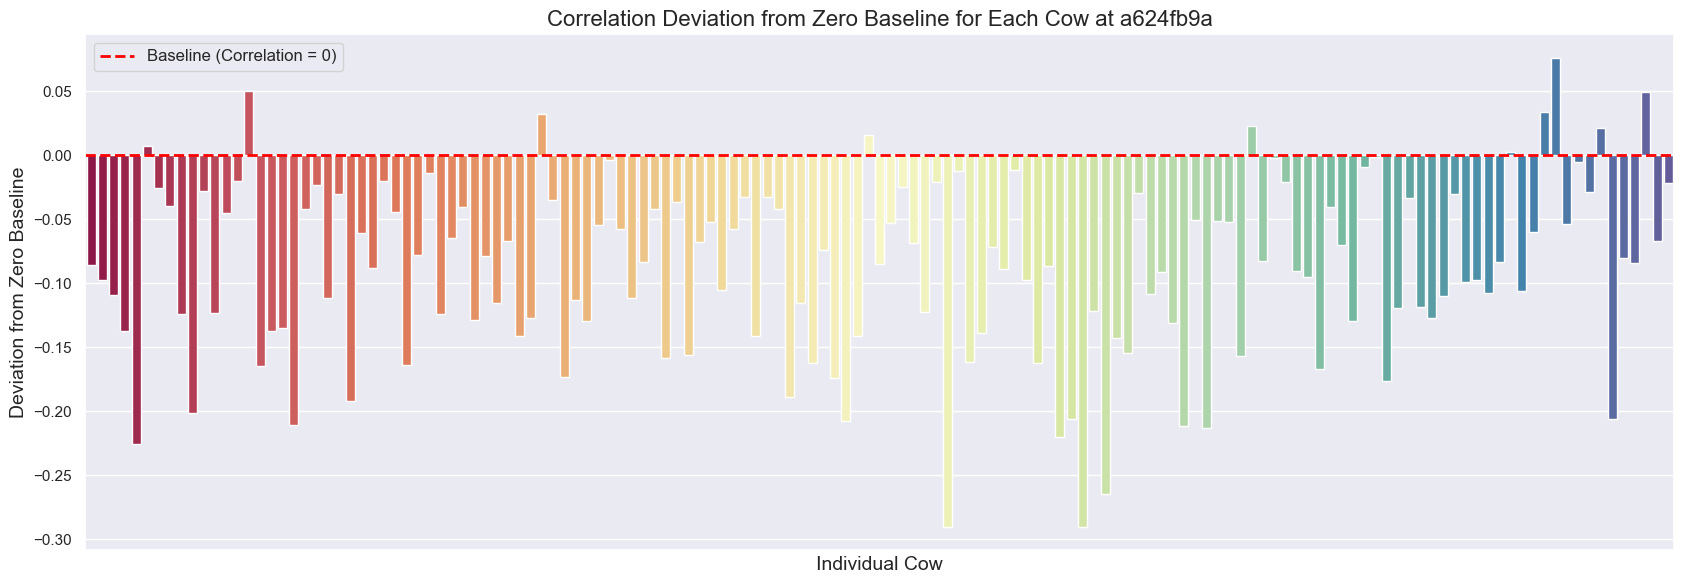

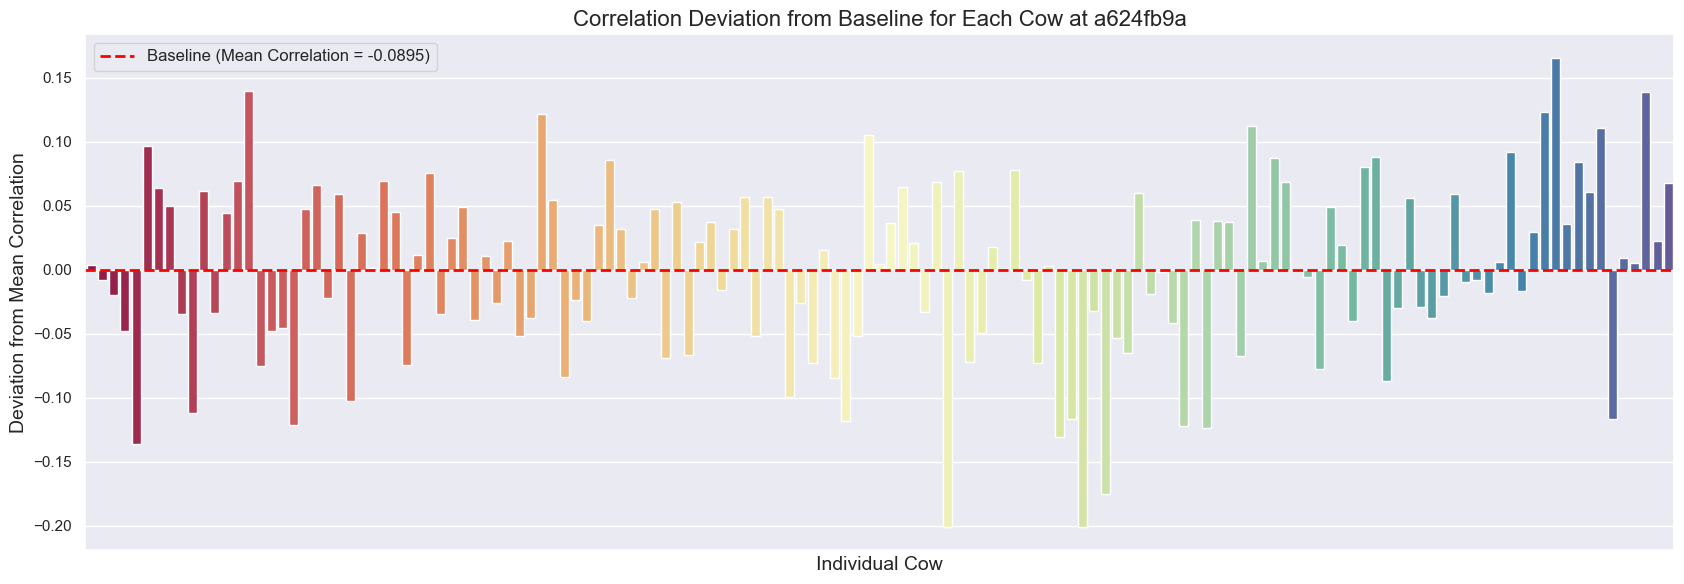

In [6]:
farm_name = 'a624fb9a'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

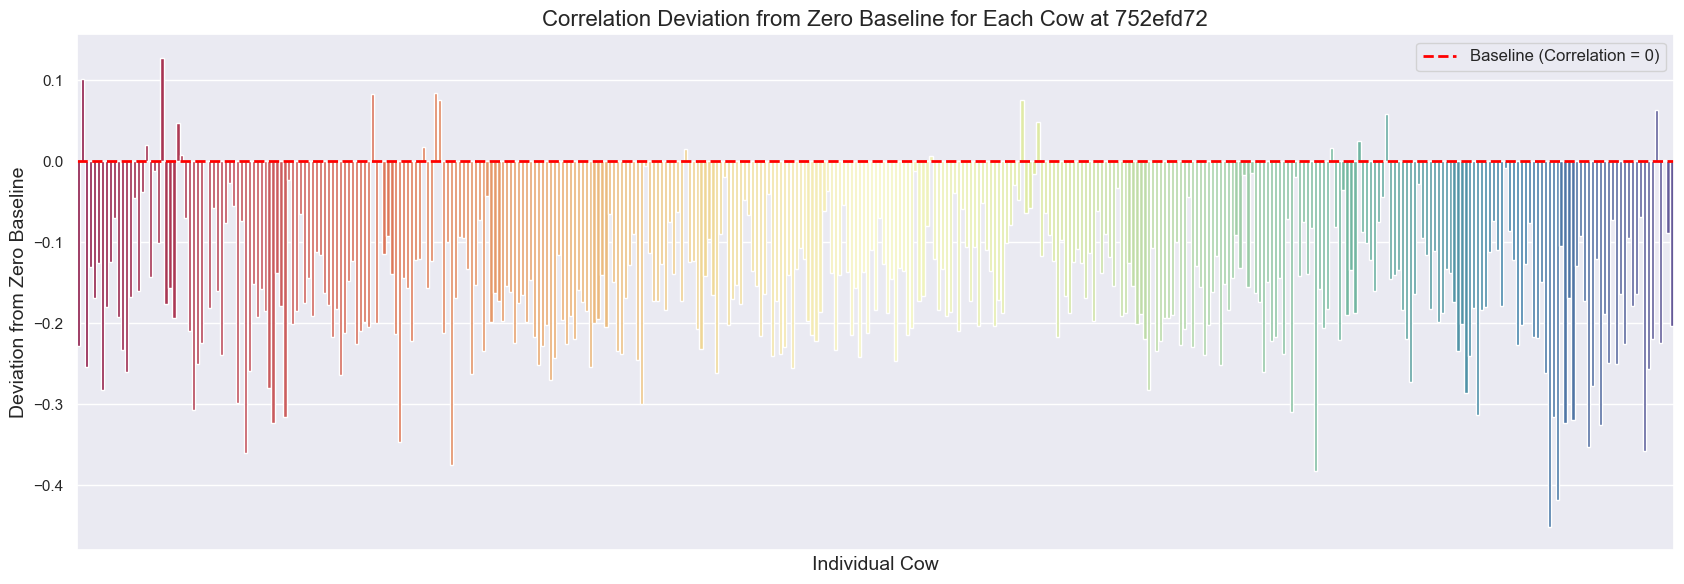

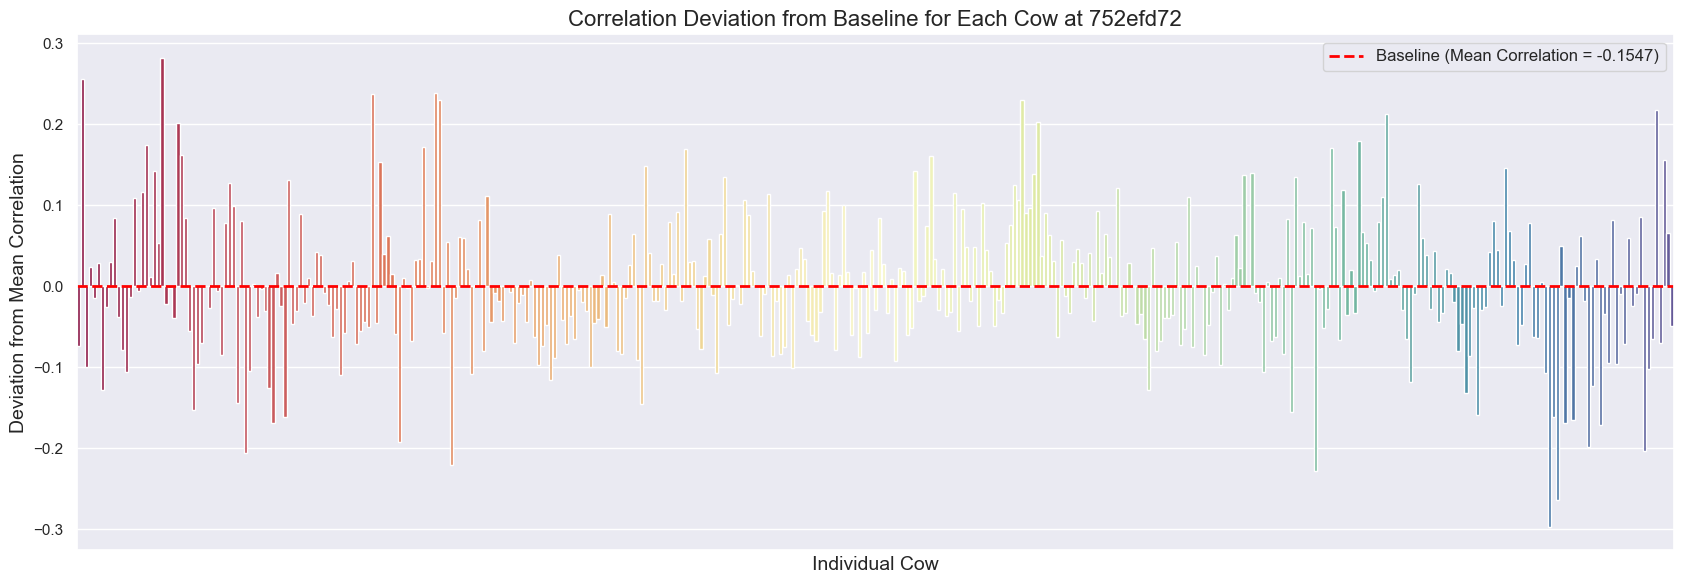

In [7]:
farm_name = '752efd72'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

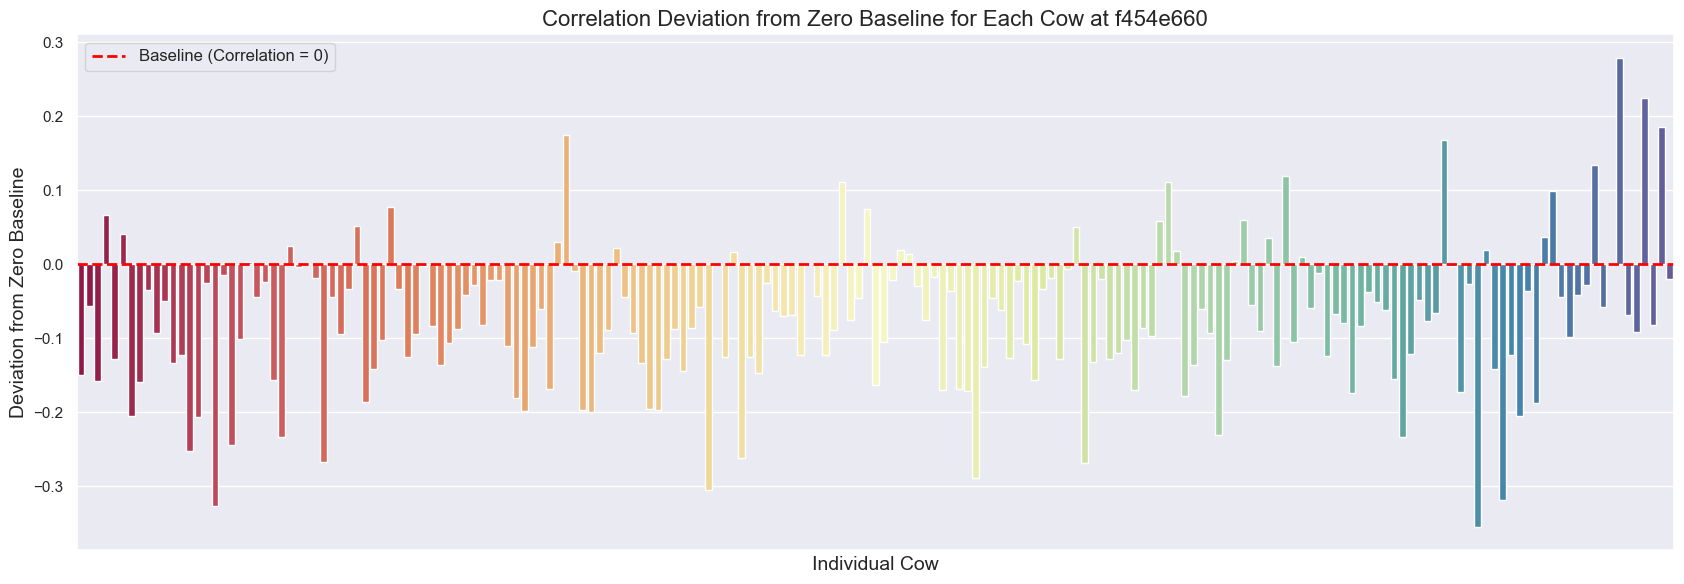

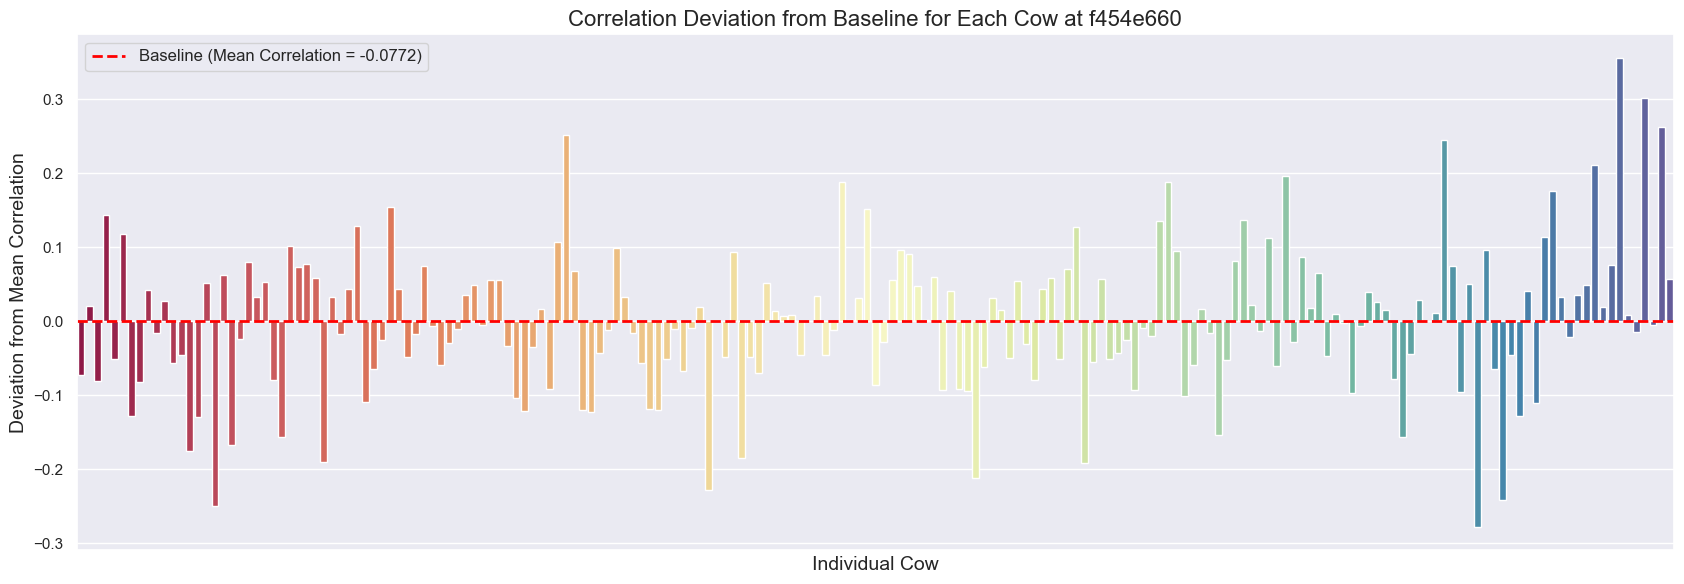

In [8]:
farm_name = 'f454e660'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

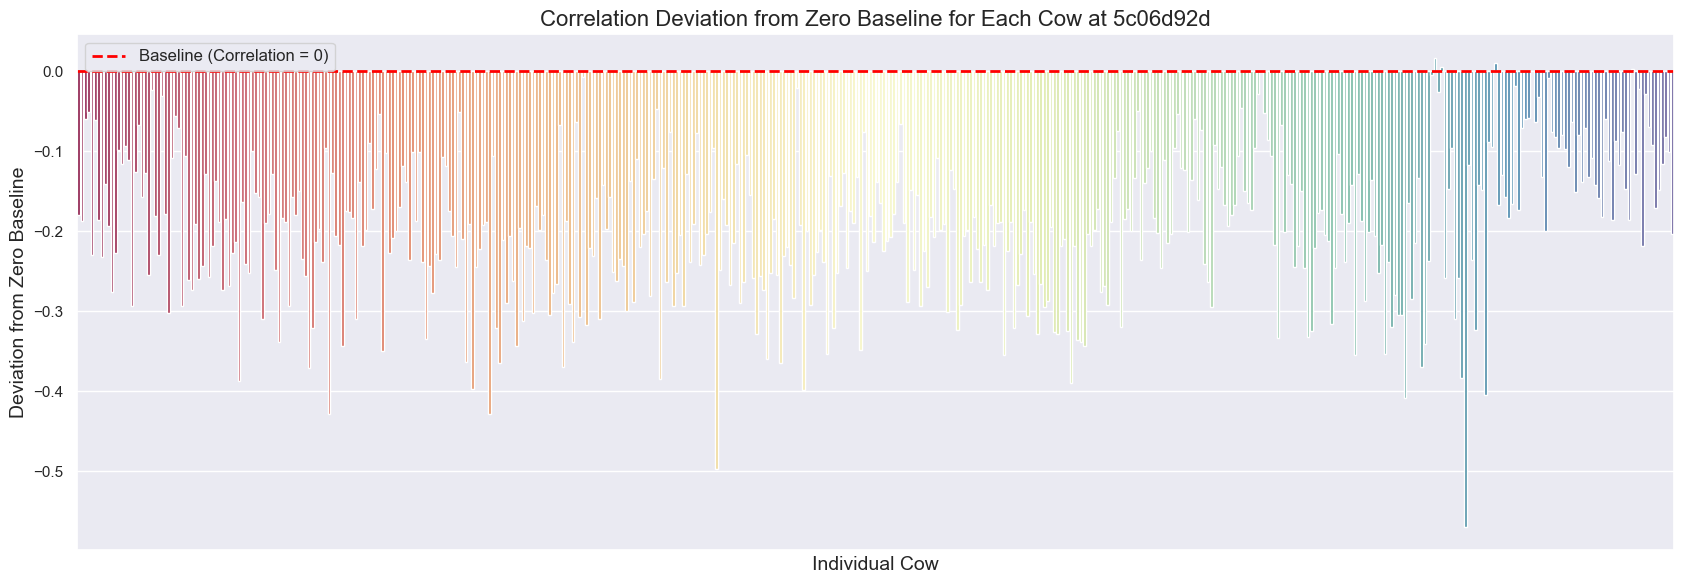

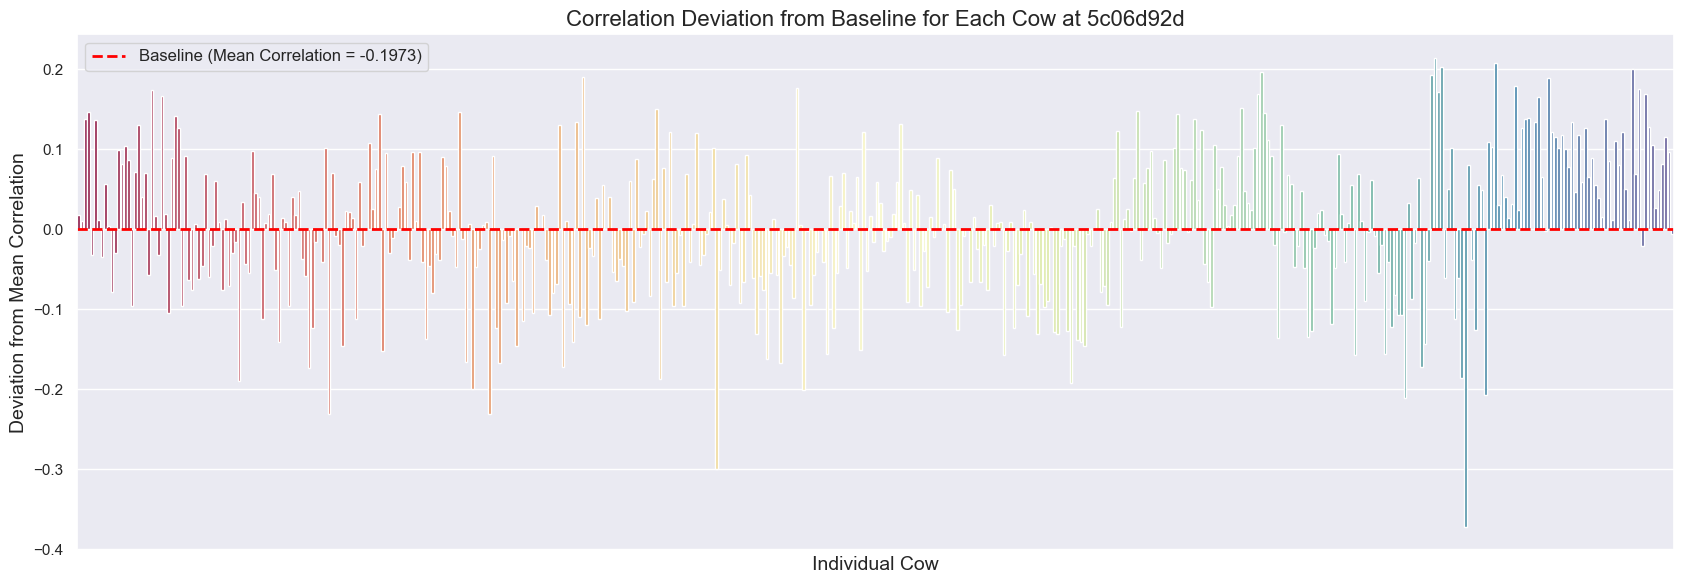

In [9]:
farm_name = '5c06d92d'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)